In [1]:
x=1

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from matplotlib import pyplot as plt

# DPI = 300
random.seed(123)

In [3]:
df_hao = pd.read_csv('csv/all_metrics_hao.csv', index_col=0)
df_10x = pd.read_csv('csv/all_metrics_10x.csv', index_col=0)
df_neurips_cite = pd.read_csv('csv/all_metrics_neurips_cite.csv', index_col=0)
df_neurips_multiome = pd.read_csv('csv/all_metrics_neurips_multiome.csv', index_col=0)

In [4]:
df = pd.concat([df_hao['Total'], df_10x['Total'], df_neurips_cite['Total'], df_neurips_multiome['Total']], axis=1)
# df.columns = ['Hao 2020\n (RNA-protein)', '10x (RNA-ATAC)', 'NeurIPS 2021\n (RNA-protein)', 'NeurIPS 2021\n (RNA-ATAC)']
df = df.T
df

,Multigrate,totalVI,Seurat WNN,MOFA+,multiVI
Total,0.808317,0.784650,0.778162,0.722919,NaN
Total,0.739327,NaN,0.723973,0.714148,0.718981
Total,0.763309,0.776807,0.714665,0.657749,NaN
Total,0.780196,NaN,0.761807,0.647843,0.765566


In [5]:
df = df[['Multigrate', 'totalVI',  'Seurat WNN', 'multiVI', 'MOFA+']]
df.index = ['Hao 2020\n (RNA-protein)', '10x (RNA-ATAC)', 'NeurIPS 2021\n (RNA-protein)', 'NeurIPS 2021\n (RNA-ATAC)']
df

,Multigrate,totalVI,Seurat WNN,multiVI,MOFA+
Hao 2020\n (RNA-protein),0.808317,0.784650,0.778162,NaN,0.722919
10x (RNA-ATAC),0.739327,NaN,0.723973,0.718981,0.714148
NeurIPS 2021\n (RNA-protein),0.763309,0.776807,0.714665,NaN,0.657749
NeurIPS 2021\n (RNA-ATAC),0.780196,NaN,0.761807,0.765566,0.647843


In [6]:
palette=["black", "#a6dcef", "red", "#00a8cc", "gray"]

In [7]:
colors = {"Multigrate": "black", "totalVI": "#a6dcef", "Seurat WNN": "red", "MOFA+": "#00a8cc", "multiVI": "gray"}

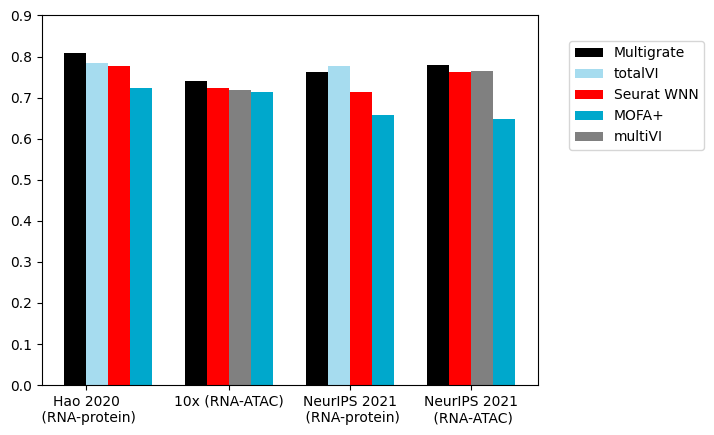

In [8]:
ax = plt.gca()

# width of bars
width = 1

# create emptly lists for x tick positions and names
x_ticks, x_ticks_pos = [], []

# counter for helping with x tick positions
count = 0

# reset the index
# so that we can iterate through the numbers.
# this will help us to get the x tick positions
df = df.reset_index()
# go through each row of the dataframe
for idx, row in df.iterrows():
    # this will be the first bar position for this row
    count += 1
    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    for column in df.drop(["index"], axis=1).columns:
        if row[column] == row[column]:
            plt.bar(count, row[column], color=colors[column], width=width, label=column)
            count += 1
            end_idx += width
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)
        x_ticks.append(row["index"])
    count += 0.5

# now set the x_ticks
x_ticks_pos = [1.5, 8, 13.5, 19] # otherwise weird
plt.xticks(x_ticks_pos, x_ticks)
# also plot the legends
# and make sure to not display duplicate labels
# the below code is taken from:
# https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 0.95))
plt.ylim(0, 0.9)
plt.savefig('figures/bar_overall_scib.svg', bbox_inches='tight')

plt.show()